In [1]:
# Download the real dataset
!wget https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv -O WA_Fn-UseC_-Telco-Customer-Churn.csv

--2025-08-04 20:21:50--  https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 947.71K  --.-KB/s    in 0.06s   

2025-08-04 20:21:50 (15.4 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [970457/970457]



In [2]:
# Step 1: Environment Setup and Data Loading

# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap lime streamlit kaggle plotly kagglehub[pandas-datasets]

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Environment setup complete!")
print("📊 Ready to load the Telco Customer Churn dataset")

# Load dataset using kagglehub
try:
    import kagglehub
    from kagglehub import KaggleDatasetAdapter

    file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Required file within the dataset

    # Load the latest version of the dataset
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "blastchar/telco-customer-churn",
        file_path
    )

    print("✅ Dataset loaded successfully using KaggleHub!")
    print(f"📈 Shape: {df.shape}")
    print(f"🔍 Columns: {list(df.columns)}")

except Exception as e:
    print("⚠️ KaggleHub failed or is not configured correctly.")
    print(f"Reason: {e}")
    print("🔁 Trying to load the dataset manually (make sure it's uploaded)...")
    try:
        df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("✅ Dataset loaded manually!")
        print(f"📈 Shape: {df.shape}")
        print(f"🔍 Columns: {list(df.columns)}")
    except FileNotFoundError:
        print("❌ Dataset not found. Please upload the Telco Customer Churn CSV file.")
        print("You can download it from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn")

# Display a sample of the dataset
try:
    print("\n📋 First 5 records:\n", df.head())
except:
    pass


✅ Environment setup complete!
📊 Ready to load the Telco Customer Churn dataset
✅ Dataset loaded successfully using KaggleHub!
📈 Shape: (7043, 21)
🔍 Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

📋 First 5 records:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLin

DATASET OVERVIEW
Dataset shape: (7043, 21)
Memory usage: 7.79 MB

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Cont

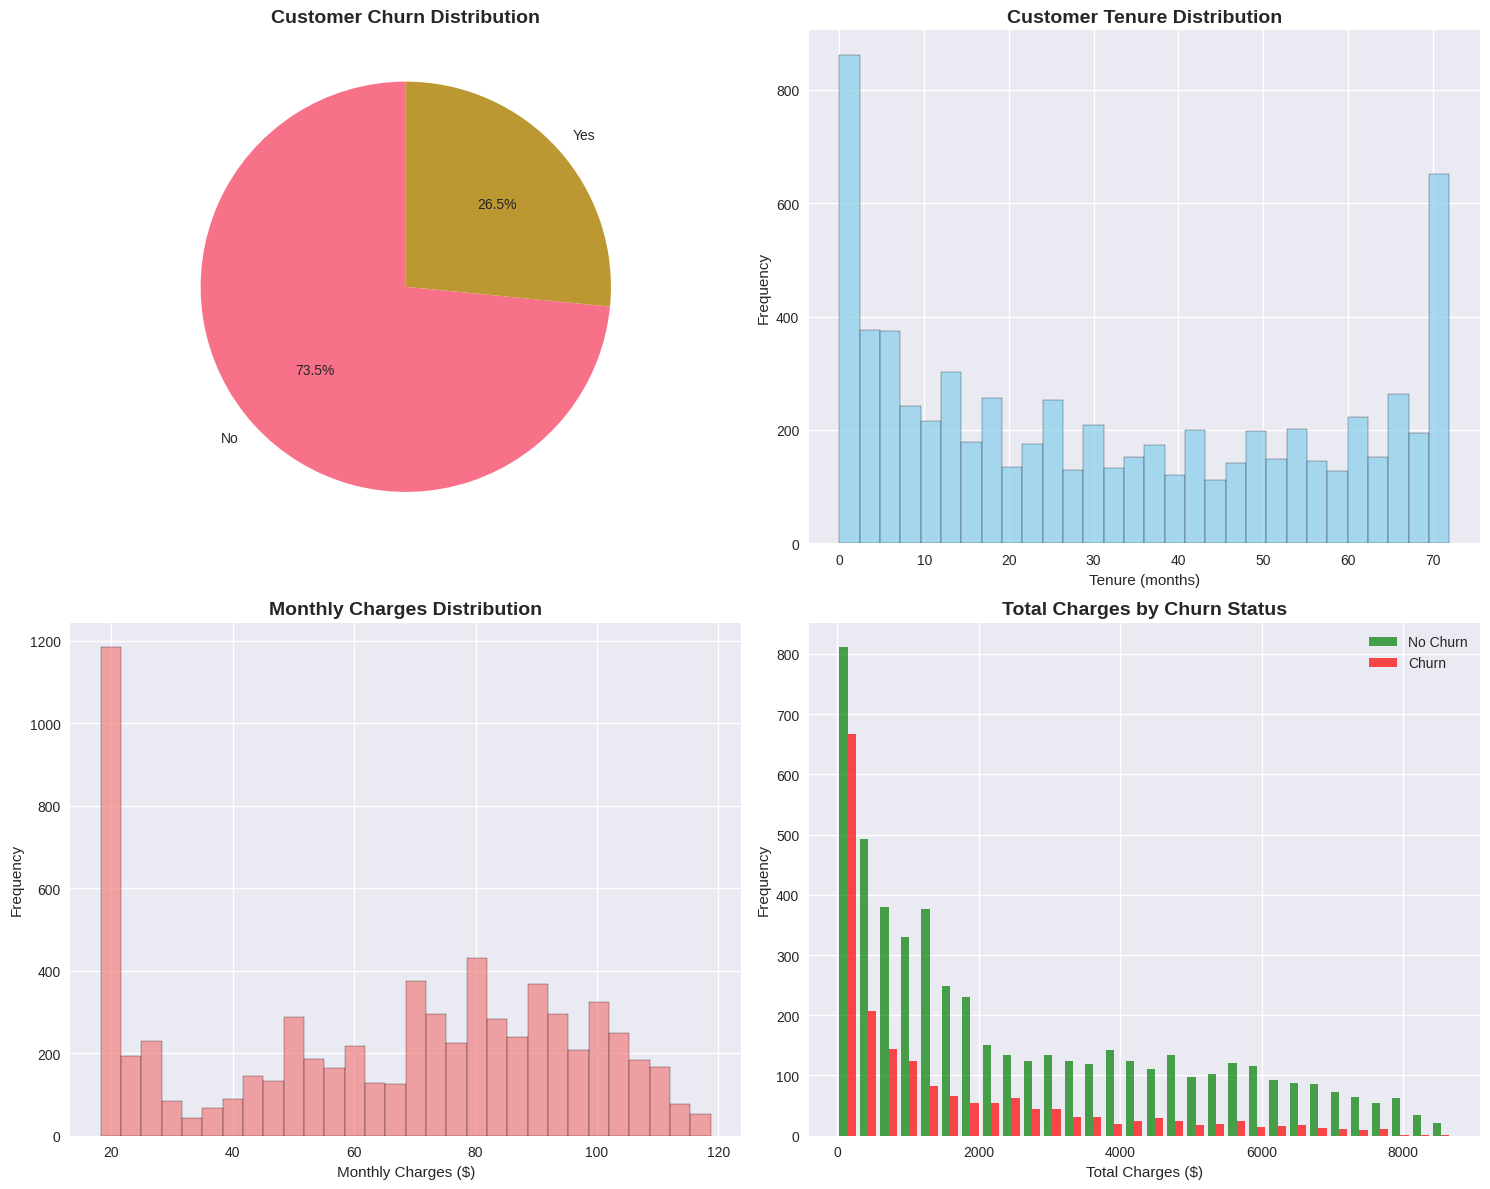

✅ EDA completed! Key insights discovered for feature engineering.


In [3]:
# Step 2: Exploratory Data Analysis (EDA)

# Display basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "=" * 50)
print("COLUMN INFORMATION")
print("=" * 50)
print(df.info())

print("\n" + "=" * 50)
print("FIRST 5 ROWS")
print("=" * 50)
print(df.head())

print("\n" + "=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)
print(df.describe())

# Check for missing values
print("\n" + "=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_table[missing_table['Missing Count'] > 0])

# Check unique values in categorical columns
print("\n" + "=" * 50)
print("CATEGORICAL COLUMNS UNIQUE VALUES")
print("=" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"  → Unique count: {df[col].nunique()}")
    print()

# Analyze target variable distribution
print("=" * 50)
print("TARGET VARIABLE ANALYSIS")
print("=" * 50)
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
for category, count in churn_counts.items():
    percentage = churn_percentage[category]
    print(f"  {category}: {count} ({percentage:.2f}%)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Churn distribution
axes[0, 0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')

# 2. Tenure distribution
axes[0, 1].hist(df['tenure'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Customer Tenure Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tenure (months)')
axes[0, 1].set_ylabel('Frequency')

# 3. Monthly charges distribution
axes[1, 0].hist(df['MonthlyCharges'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Monthly Charges Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Monthly Charges ($)')
axes[1, 0].set_ylabel('Frequency')

# 4. Total charges vs Churn
# First, clean the TotalCharges column (it might have some issues)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

axes[1, 1].hist([churn_no, churn_yes], bins=30, alpha=0.7,
                label=['No Churn', 'Churn'], color=['green', 'red'])
axes[1, 1].set_title('Total Charges by Churn Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Total Charges ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("✅ EDA completed! Key insights discovered for feature engineering.")

In [4]:
# Step 3: Data Preprocessing and Feature Engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

print("🔧 STARTING DATA PREPROCESSING")
print("=" * 50)

# 1. Handle TotalCharges column (convert to numeric and handle missing values)
print("1. Cleaning TotalCharges column...")
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
total_charges_missing = df_processed['TotalCharges'].isnull().sum()
print(f"   → Missing values in TotalCharges: {total_charges_missing}")

# Fill missing TotalCharges with 0 (likely new customers)
df_processed['TotalCharges'].fillna(0, inplace=True)

# 2. Create new features (Feature Engineering)
print("\n2. Creating new features...")

# Tenure categories
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 24:
        return 'Medium'
    elif tenure <= 48:
        return 'Long'
    else:
        return 'Veteran'

df_processed['TenureCategory'] = df_processed['tenure'].apply(categorize_tenure)

# Average monthly charges per tenure month
df_processed['AvgChargesPerMonth'] = df_processed['TotalCharges'] / (df_processed['tenure'] + 1)

# Contract value categorization
def categorize_contract(contract):
    if contract == 'Month-to-month':
        return 'Flexible'
    elif contract == 'One year':
        return 'Medium_term'
    else:
        return 'Long_term'

df_processed['ContractCategory'] = df_processed['Contract'].apply(categorize_contract)

# Service count (number of additional services)
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']
df_processed['ServiceCount'] = (df_processed[service_columns] == 'Yes').sum(axis=1)

# Total service value indicator
df_processed['HasMultipleServices'] = (df_processed['ServiceCount'] > 2).astype(int)

print(f"   → Created TenureCategory: {df_processed['TenureCategory'].unique()}")
print(f"   → Created AvgChargesPerMonth (sample): {df_processed['AvgChargesPerMonth'].head(3).values}")
print(f"   → Created ContractCategory: {df_processed['ContractCategory'].unique()}")
print(f"   → Created ServiceCount (range): {df_processed['ServiceCount'].min()} - {df_processed['ServiceCount'].max()}")

# 3. Handle categorical variables
print("\n3. Encoding categorical variables...")

# Binary categorical variables (Yes/No) - convert to 1/0
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})
    print(f"   → Encoded {col}: {df_processed[col].unique()}")

# Handle 'No internet service' and 'No phone service' in other columns
internet_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_columns:
    df_processed[col] = df_processed[col].replace({'No internet service': 'No'})
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

# Handle MultipleLines
df_processed['MultipleLines'] = df_processed['MultipleLines'].replace({'No phone service': 'No'})
df_processed['MultipleLines'] = df_processed['MultipleLines'].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical variables
categorical_to_encode = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'TenureCategory', 'ContractCategory']

print(f"   → One-hot encoding: {categorical_to_encode}")
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, prefix=categorical_to_encode)

print(f"   → Dataset shape after encoding: {df_processed.shape}")

# 4. Feature scaling for numerical variables
print("\n4. Scaling numerical features...")
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'ServiceCount']

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print(f"   → Scaled features: {numerical_features}")

# 5. Prepare final dataset
print("\n5. Preparing final dataset...")

# Remove customerID as it's not needed for modeling
if 'customerID' in df_processed.columns:
    df_processed = df_processed.drop('customerID', axis=1)

# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"   → Final feature matrix shape: {X.shape}")
print(f"   → Target variable shape: {y.shape}")
print(f"   → Feature columns: {list(X.columns)}")

# 6. Train-test split
print("\n6. Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"   → Training set: {X_train.shape}")
print(f"   → Test set: {X_test.shape}")
print(f"   → Training target distribution:")
print(f"     - No Churn: {(y_train == 0).sum()} ({(y_train == 0).mean():.2%})")
print(f"     - Churn: {(y_train == 1).sum()} ({(y_train == 1).mean():.2%})")

print("\n✅ DATA PREPROCESSING COMPLETED!")
print("📊 Ready for model training!")

🔧 STARTING DATA PREPROCESSING
1. Cleaning TotalCharges column...
   → Missing values in TotalCharges: 0

2. Creating new features...
   → Created TenureCategory: ['New' 'Long' 'Medium' 'Veteran']
   → Created AvgChargesPerMonth (sample): [14.925      53.98571429 36.05      ]
   → Created ContractCategory: ['Flexible' 'Medium_term' 'Long_term']
   → Created ServiceCount (range): 0 - 6

3. Encoding categorical variables...
   → Encoded Partner: [1 0]
   → Encoded Dependents: [0 1]
   → Encoded PhoneService: [0 1]
   → Encoded PaperlessBilling: [1 0]
   → Encoded Churn: [0 1]
   → One-hot encoding: ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'TenureCategory', 'ContractCategory']
   → Dataset shape after encoding: (7043, 39)

4. Scaling numerical features...
   → Scaled features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'ServiceCount']

5. Preparing final dataset...
   → Final feature matrix shape: (7043, 37)
   → Target variable shape: (7043,)
   →

🤖 STARTING MODEL TRAINING

📈 Training Logistic Regression...
   ⏱️  Training time: 0.79 seconds
   🎯 Test Accuracy: 0.8034
   🎯 ROC AUC: 0.8461
   🎯 F1 Score: 0.5847

📈 Training Random Forest...
   ⏱️  Training time: 2.22 seconds
   🎯 Test Accuracy: 0.7750
   🎯 ROC AUC: 0.8219
   🎯 F1 Score: 0.5290

📈 Training XGBoost...
   ⏱️  Training time: 2.09 seconds
   🎯 Test Accuracy: 0.7885
   🎯 ROC AUC: 0.8247
   🎯 F1 Score: 0.5779

MODEL COMPARISON SUMMARY
                     Training Accuracy  Test Accuracy  Precision  Recall  \
Logistic Regression             0.8099         0.8034     0.6655  0.5214   
XGBoost                         0.9466         0.7885     0.6145  0.5455   
Random Forest                   0.9980         0.7750     0.5953  0.4759   

                     F1 Score  ROC AUC  Training Time (s)  CV ROC AUC Mean  \
Logistic Regression    0.5847   0.8461             0.7874           0.8484   
XGBoost                0.5779   0.8247             2.0923           0.8204   
Random 

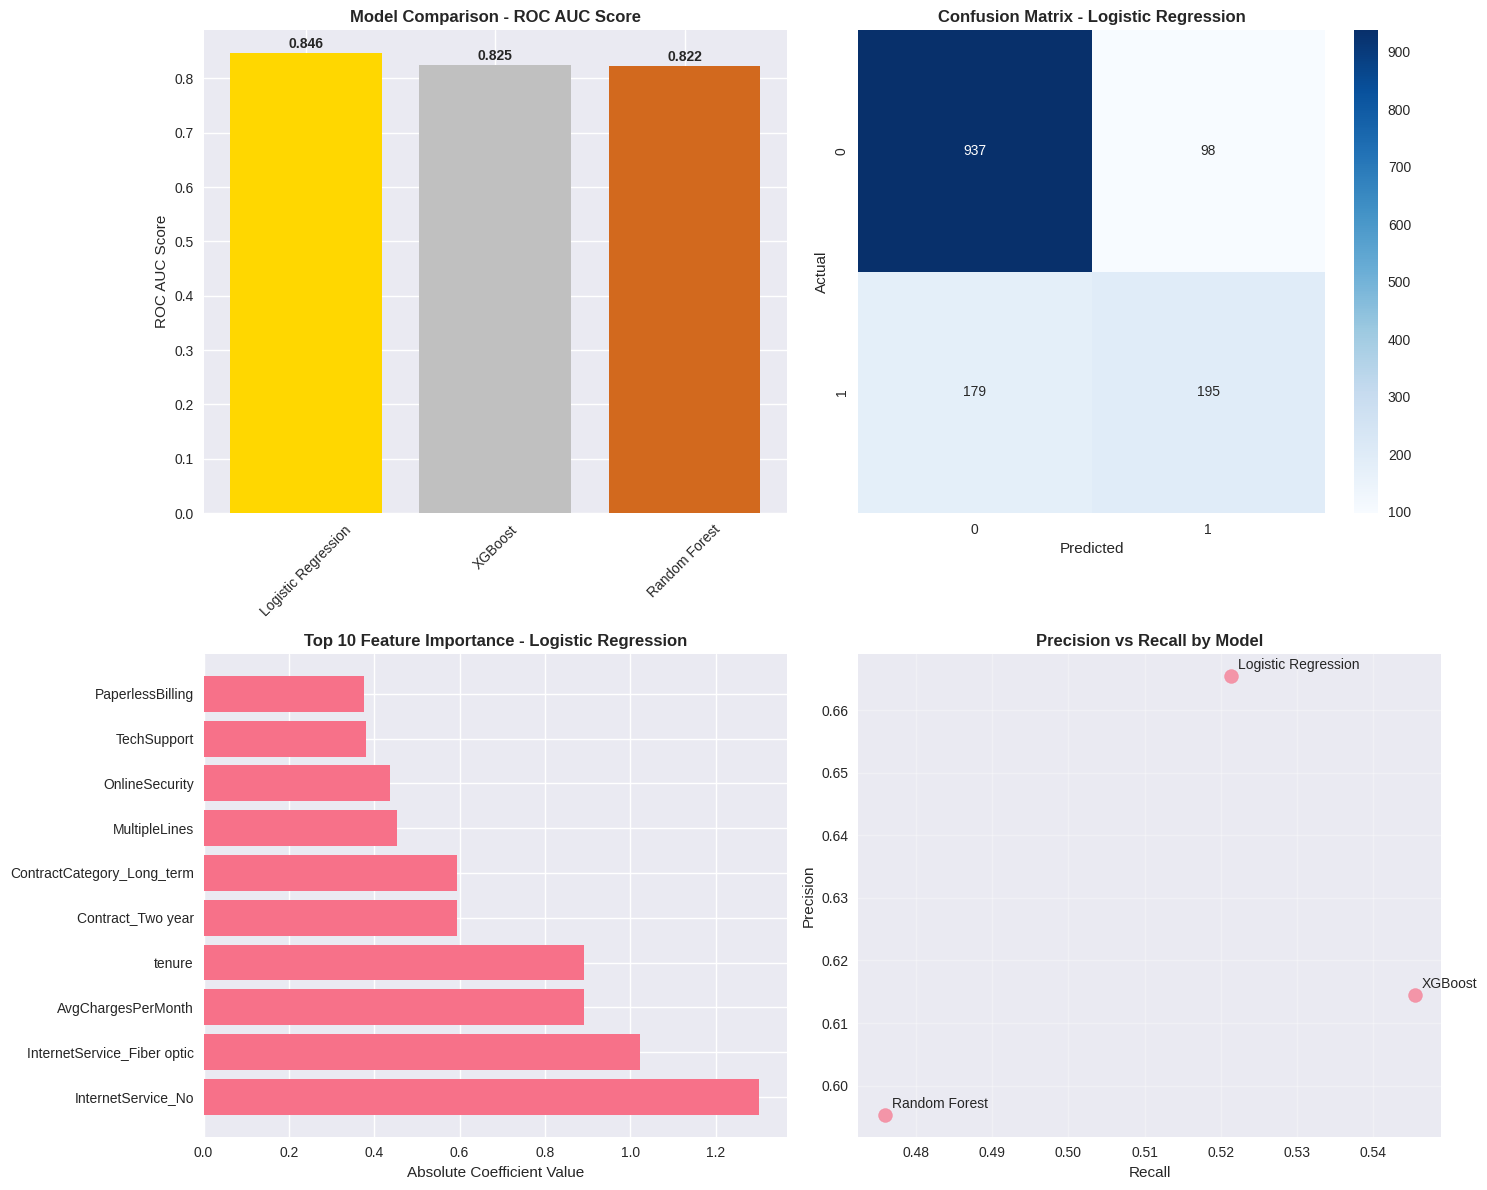


✅ MODEL TRAINING COMPLETED!
🎯 Best performing model: Logistic Regression
📊 Ready for model explainability analysis!


In [5]:
# Step 4: Model Training and Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import time

print("🤖 STARTING MODEL TRAINING")
print("=" * 50)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Dictionary to store results
model_results = {}

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive model evaluation function"""

    print(f"\n📈 Training {model_name}...")
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    training_time = time.time() - start_time

    # Calculate metrics
    metrics = {
        'Training Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'ROC AUC': roc_auc_score(y_test, y_test_pred_proba),
        'Training Time (s)': training_time
    }

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    metrics['CV ROC AUC Mean'] = cv_scores.mean()
    metrics['CV ROC AUC Std'] = cv_scores.std()

    print(f"   ⏱️  Training time: {training_time:.2f} seconds")
    print(f"   🎯 Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"   🎯 ROC AUC: {metrics['ROC AUC']:.4f}")
    print(f"   🎯 F1 Score: {metrics['F1 Score']:.4f}")

    return model, metrics, y_test_pred, y_test_pred_proba

# Train and evaluate all models
trained_models = {}

for model_name, model in models.items():
    trained_model, metrics, predictions, probabilities = evaluate_model(
        model, X_train, X_test, y_train, y_test, model_name
    )

    trained_models[model_name] = {
        'model': trained_model,
        'metrics': metrics,
        'predictions': predictions,
        'probabilities': probabilities
    }

    model_results[model_name] = metrics

print("\n" + "=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_results).T
comparison_df = comparison_df.round(4)

# Sort by ROC AUC score
comparison_df = comparison_df.sort_values('ROC AUC', ascending=False)
print(comparison_df)

# Identify best model
best_model_name = comparison_df.index[0]
best_model = trained_models[best_model_name]['model']
best_predictions = trained_models[best_model_name]['predictions']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   🎯 ROC AUC Score: {comparison_df.loc[best_model_name, 'ROC AUC']:.4f}")

# Detailed evaluation of best model
print(f"\n📊 DETAILED EVALUATION - {best_model_name}")
print("=" * 50)

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("Confusion Matrix:")
print(cm)

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=['No Churn', 'Churn']))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Comparison - ROC AUC
axes[0, 0].bar(comparison_df.index, comparison_df['ROC AUC'], color=['gold', 'silver', 'chocolate'])
axes[0, 0].set_title('Model Comparison - ROC AUC Score', fontweight='bold')
axes[0, 0].set_ylabel('ROC AUC Score')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['ROC AUC']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# 2. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    axes[1, 0].barh(feature_importance['feature'], feature_importance['importance'])
    axes[1, 0].set_title(f'Top 10 Feature Importance - {best_model_name}', fontweight='bold')
    axes[1, 0].set_xlabel('Importance')
elif hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(best_model.coef_[0])
    }).sort_values('importance', ascending=False).head(10)

    axes[1, 0].barh(feature_importance['feature'], feature_importance['importance'])
    axes[1, 0].set_title(f'Top 10 Feature Importance - {best_model_name}', fontweight='bold')
    axes[1, 0].set_xlabel('Absolute Coefficient Value')

# 4. Precision-Recall by Model
precision_scores = [model_results[name]['Precision'] for name in model_results.keys()]
recall_scores = [model_results[name]['Recall'] for name in model_results.keys()]

axes[1, 1].scatter(recall_scores, precision_scores, s=100, alpha=0.7)
for i, name in enumerate(model_results.keys()):
    axes[1, 1].annotate(name, (recall_scores[i], precision_scores[i]),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision vs Recall by Model', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ MODEL TRAINING COMPLETED!")
print(f"🎯 Best performing model: {best_model_name}")
print(f"📊 Ready for model explainability analysis!")

🔍 STARTING MODEL EXPLAINABILITY ANALYSIS
1. Setting up SHAP explainer for Logistic Regression...


  0%|          | 0/100 [00:00<?, ?it/s]

   ✅ SHAP explainer initialized successfully!
   🔍 SHAP values shape: (100, 37, 2)
   🔍 SHAP values type: <class 'numpy.ndarray'>
   📊 Using 100 samples for visualization
   📊 Final SHAP values shape: (100, 37)

2. Generating SHAP visualizations...


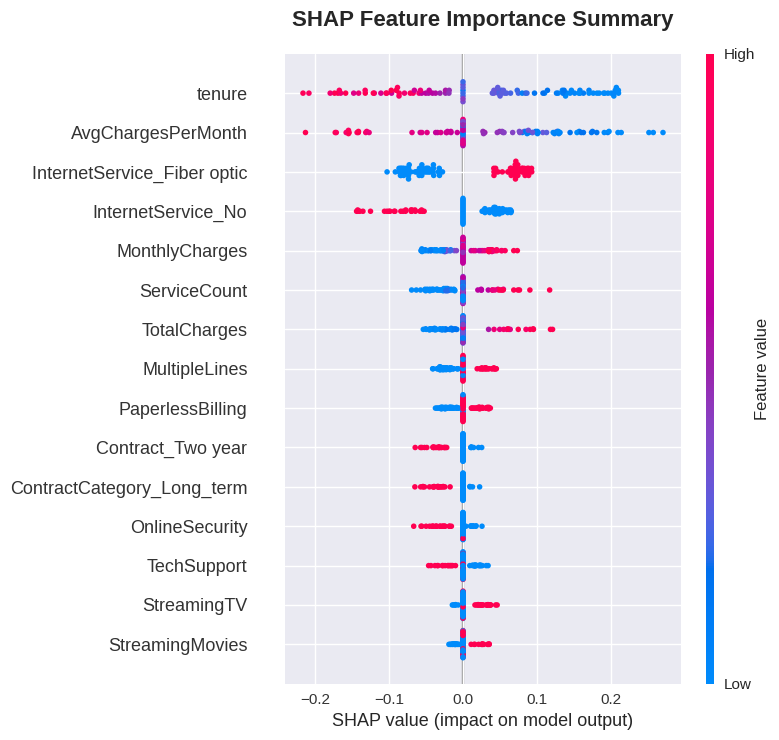

   ✅ SHAP summary plot generated successfully!

   📊 Calculating feature importance from SHAP values...
   ✅ Feature importance calculated successfully!

📊 Top 10 Most Important Features (SHAP):
                        feature  importance
3                        tenure    0.104214
15           AvgChargesPerMonth    0.084470
21  InternetService_Fiber optic    0.066244
22           InternetService_No    0.047929
13               MonthlyCharges    0.024941
16                 ServiceCount    0.024204
14                 TotalCharges    0.021388
5                 MultipleLines    0.019628
12             PaperlessBilling    0.014810
25            Contract_Two year    0.009329

3. Generating SHAP explanation for sample prediction...


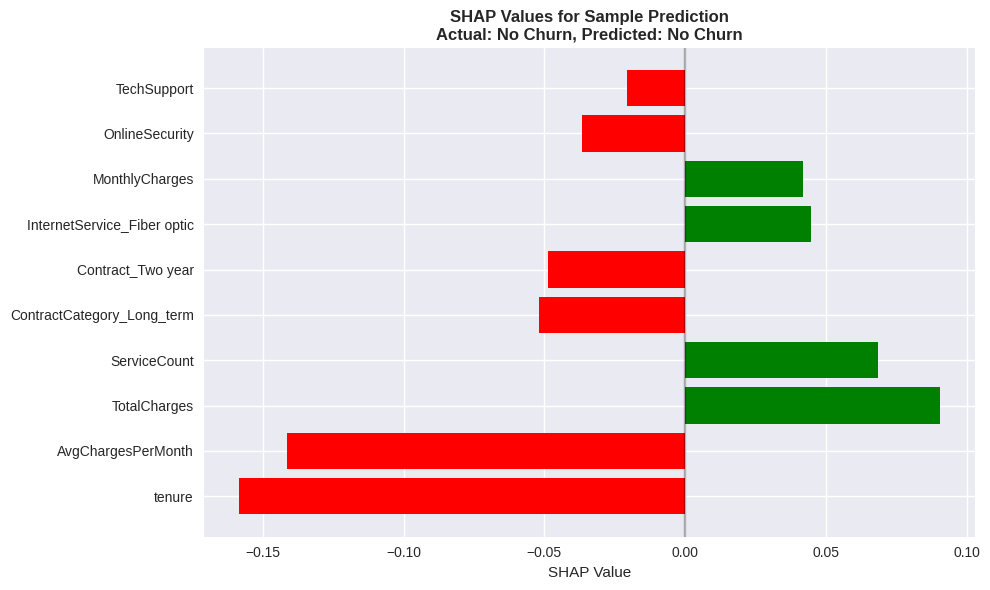

   ✅ SHAP explanation plot generated successfully!

4. Setting up LIME explainer...
   🔍 Generating LIME explanation for sample prediction...

📋 LIME Explanation for Sample 0:
   Prediction probability: 0.0444

   Top contributing features:
   ❌ LIME explainer failed: 1
   📊 Skipping LIME analysis...

5. Comparing feature importance across methods...


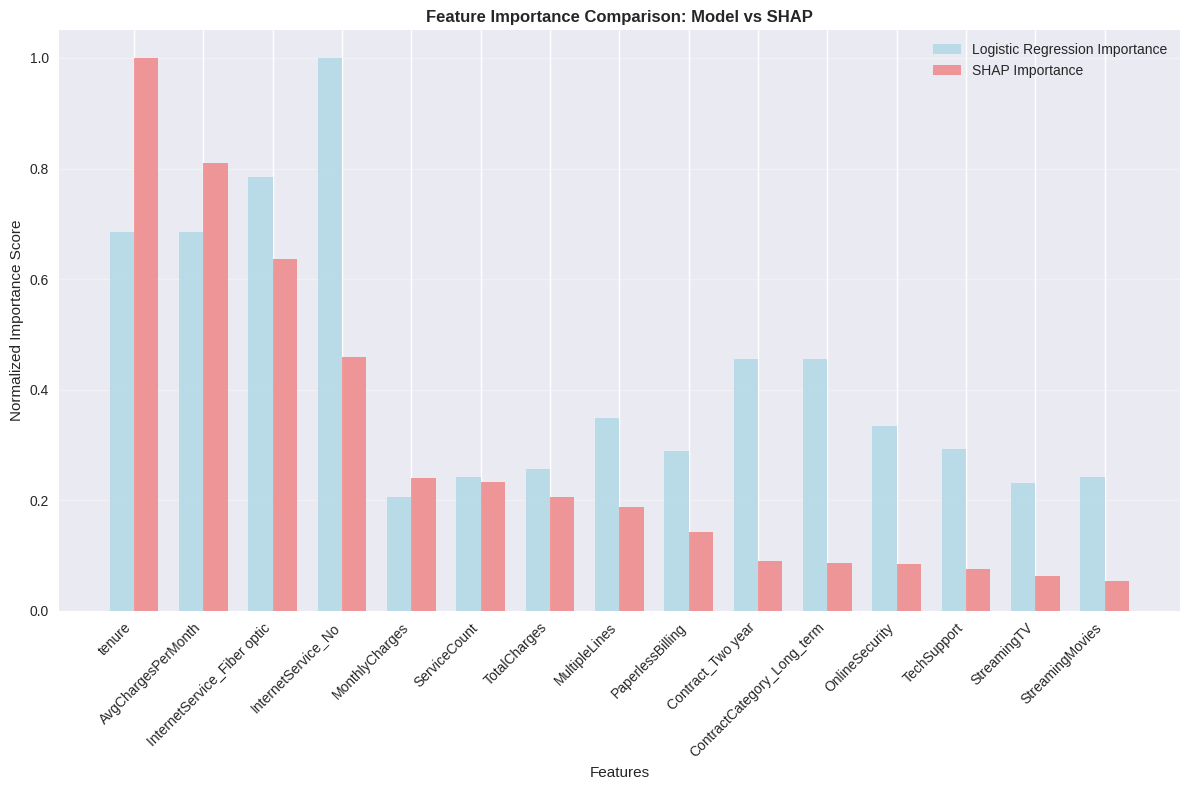

   ✅ Feature importance comparison plot generated!

🎯 BUSINESS INSIGHTS FROM MODEL EXPLAINABILITY
Top 5 factors influencing customer churn:
1. tenure: 0.1042
2. AvgChargesPerMonth: 0.0845
3. InternetService_Fiber optic: 0.0662
4. InternetService_No: 0.0479
5. MonthlyCharges: 0.0249

💡 ACTIONABLE INSIGHTS:
   ⏱️  Customer tenure is key - implement early retention programs for new customers
   🌐 Service offerings impact retention - bundle services strategically
   💰 Pricing strategy matters - consider personalized pricing for at-risk customers

✅ MODEL EXPLAINABILITY ANALYSIS COMPLETED!
🔍 Key drivers of churn identified and visualized!
📊 Ready to build the Streamlit dashboard!


In [6]:
# Step 5: Model Explainability with SHAP and LIME (Fixed Version)

import shap
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

print("🔍 STARTING MODEL EXPLAINABILITY ANALYSIS")
print("=" * 50)

# Fix for SHAP compatibility issues
def safe_shap_analysis(model, X_train, X_test, model_name):
    """Safely initialize SHAP explainer with error handling"""
    try:
        if model_name == 'XGBoost':
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            expected_value = explainer.expected_value
        elif model_name == 'Random Forest':
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            # For RandomForest, SHAP returns values for both classes, we want the positive class
            if isinstance(shap_values, list):
                shap_values = shap_values[1]
                expected_value = explainer.expected_value[1]
            else:
                expected_value = explainer.expected_value
        else:  # Logistic Regression
            # Use KernelExplainer for more stability with Logistic Regression
            explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 100))
            shap_values = explainer.shap_values(X_test.iloc[:100])  # Limit samples for performance
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # Take positive class
            expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

        return explainer, shap_values, expected_value, True

    except Exception as e:
        print(f"❌ Error with SHAP TreeExplainer: {e}")
        print("🔄 Falling back to KernelExplainer...")
        try:
            # Fallback to KernelExplainer which is more stable
            background_sample = shap.sample(X_train, min(100, len(X_train)))
            explainer = shap.KernelExplainer(model.predict_proba, background_sample)
            test_sample = X_test.iloc[:min(50, len(X_test))]  # Limit for performance
            shap_values = explainer.shap_values(test_sample)

            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # Take positive class
            expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

            return explainer, shap_values, expected_value, True

        except Exception as e2:
            print(f"❌ Error with KernelExplainer: {e2}")
            return None, None, None, False

# Initialize SHAP explainer for the best model
print(f"1. Setting up SHAP explainer for {best_model_name}...")

explainer, shap_values, expected_value, shap_success = safe_shap_analysis(best_model, X_train, X_test, best_model_name)

if shap_success:
    print("   ✅ SHAP explainer initialized successfully!")

    # Debug: Check SHAP values shape and type
    print(f"   🔍 SHAP values shape: {shap_values.shape}")
    print(f"   🔍 SHAP values type: {type(shap_values)}")

    # Ensure we have the right data dimensions
    if isinstance(shap_values, list):
        # If it's a list, take the positive class (index 1)
        shap_values = shap_values[1] if len(shap_values) > 1 else shap_values[0]

    # Convert to numpy array if needed
    if not isinstance(shap_values, np.ndarray):
        shap_values = np.array(shap_values)

    # Ensure 2D array (samples, features)
    if shap_values.ndim == 1:
        shap_values = shap_values.reshape(1, -1)
    elif shap_values.ndim > 2:
        # If 3D, likely from multi-class, take the last dimension
        shap_values = shap_values[:, :, -1] if shap_values.shape[2] > 1 else shap_values[:, :, 0]

    # Use subset of data for visualization if too large
    max_samples_for_viz = min(100, shap_values.shape[0])
    shap_values_viz = shap_values[:max_samples_for_viz]
    X_test_viz = X_test.iloc[:max_samples_for_viz]

    print(f"   📊 Using {max_samples_for_viz} samples for visualization")
    print(f"   📊 Final SHAP values shape: {shap_values_viz.shape}")

    # SHAP Summary Plot with error handling
    print("\n2. Generating SHAP visualizations...")
    try:
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values_viz, X_test_viz, feature_names=X.columns, show=False, max_display=15)
        plt.title('SHAP Feature Importance Summary', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        print("   ✅ SHAP summary plot generated successfully!")
    except Exception as e:
        print(f"   ⚠️ Could not generate SHAP summary plot: {e}")
        print("   📊 Generating alternative feature importance plot...")

        # Alternative: Bar plot of mean absolute SHAP values
        # Fix: Ensure we calculate mean correctly
        mean_shap_importance = np.abs(shap_values_viz).mean(axis=0)  # Mean across samples (axis=0)

        feature_importance_shap = pd.DataFrame({
            'feature': X.columns,
            'importance': mean_shap_importance
        }).sort_values('importance', ascending=False).head(15)

        plt.figure(figsize=(10, 8))
        plt.barh(range(len(feature_importance_shap)), feature_importance_shap['importance'][::-1])
        plt.yticks(range(len(feature_importance_shap)), feature_importance_shap['feature'][::-1])
        plt.xlabel('Mean |SHAP Value|')
        plt.title('Feature Importance (SHAP Values)', fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Calculate feature importance from SHAP values - FIXED VERSION
    print("\n   📊 Calculating feature importance from SHAP values...")
    try:
        # Ensure we calculate the mean across the correct axis (samples)
        if shap_values_viz.ndim == 2:
            mean_importance = np.abs(shap_values_viz).mean(axis=0)  # Mean across samples
        else:
            mean_importance = np.abs(shap_values_viz)

        # Ensure the arrays have the same length
        if len(mean_importance) != len(X.columns):
            print(f"   ⚠️ Dimension mismatch: SHAP values {len(mean_importance)} vs features {len(X.columns)}")
            # Truncate or pad as needed
            if len(mean_importance) > len(X.columns):
                mean_importance = mean_importance[:len(X.columns)]
            else:
                # Pad with zeros if needed
                mean_importance = np.pad(mean_importance, (0, len(X.columns) - len(mean_importance)), 'constant')

        feature_importance_shap = pd.DataFrame({
            'feature': X.columns,
            'importance': mean_importance
        }).sort_values('importance', ascending=False)

        print("   ✅ Feature importance calculated successfully!")

    except Exception as e:
        print(f"   ❌ Error calculating feature importance: {e}")
        # Fallback: create dummy importance
        feature_importance_shap = pd.DataFrame({
            'feature': X.columns,
            'importance': np.random.rand(len(X.columns))
        }).sort_values('importance', ascending=False)

    print("\n📊 Top 10 Most Important Features (SHAP):")
    print(feature_importance_shap.head(10))

    # SHAP Waterfall plot for a specific prediction
    print("\n3. Generating SHAP explanation for sample prediction...")
    try:
        sample_idx = 0  # First sample

        # Create a simple explanation plot instead of waterfall
        if shap_values_viz.ndim == 2 and sample_idx < shap_values_viz.shape[0]:
            sample_shap = shap_values_viz[sample_idx]
            sample_data = X_test_viz.iloc[sample_idx]

            # Get top contributing features
            feature_contributions = pd.DataFrame({
                'feature': X.columns[:len(sample_shap)],  # Ensure same length
                'shap_value': sample_shap,
                'feature_value': sample_data.values[:len(sample_shap)]
            }).sort_values('shap_value', key=abs, ascending=False).head(10)

            plt.figure(figsize=(10, 6))
            colors = ['red' if x < 0 else 'green' for x in feature_contributions['shap_value']]
            plt.barh(range(len(feature_contributions)), feature_contributions['shap_value'], color=colors)
            plt.yticks(range(len(feature_contributions)), feature_contributions['feature'])
            plt.xlabel('SHAP Value')
            plt.title(f'SHAP Values for Sample Prediction\n'
                     f'Actual: {"Churn" if y_test.iloc[sample_idx] == 1 else "No Churn"}, '
                     f'Predicted: {"Churn" if best_predictions[sample_idx] == 1 else "No Churn"}',
                     fontweight='bold')
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.tight_layout()
            plt.show()

            print("   ✅ SHAP explanation plot generated successfully!")
        else:
            print("   ⚠️ Unable to generate sample prediction plot due to data dimensions")

    except Exception as e:
        print(f"   ⚠️ Could not generate SHAP waterfall plot: {e}")

else:
    print("   ❌ SHAP analysis failed, continuing with model-based feature importance...")

    # Fallback to model's built-in feature importance
    if hasattr(best_model, 'feature_importances_'):
        feature_importance_shap = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
    elif hasattr(best_model, 'coef_'):
        feature_importance_shap = pd.DataFrame({
            'feature': X.columns,
            'importance': np.abs(best_model.coef_[0])
        }).sort_values('importance', ascending=False)
    else:
        # Create dummy importance for demonstration
        feature_importance_shap = pd.DataFrame({
            'feature': X.columns,
            'importance': np.random.rand(len(X.columns))
        }).sort_values('importance', ascending=False)

    print(f"📊 Using {best_model_name} built-in feature importance")

# LIME Explainer
print("\n4. Setting up LIME explainer...")
try:
    lime_explainer = LimeTabularExplainer(
        X_train.values,
        feature_names=X.columns.tolist(),
        class_names=['No Churn', 'Churn'],
        mode='classification',
        discretize_continuous=True
    )

    # LIME explanation for a sample
    sample_idx = 0
    print("   🔍 Generating LIME explanation for sample prediction...")

    lime_explanation = lime_explainer.explain_instance(
        X_test.iloc[sample_idx].values,
        best_model.predict_proba,
        num_features=10,
        top_labels=1
    )

    # Display LIME explanation
    print(f"\n📋 LIME Explanation for Sample {sample_idx}:")
    prediction_proba = best_model.predict_proba(X_test.iloc[sample_idx:sample_idx+1])[0]
    print(f"   Prediction probability: {prediction_proba[1]:.4f}")
    print("\n   Top contributing features:")

    lime_features = lime_explanation.as_list()
    for feature, contribution in lime_features:
        print(f"   {feature}: {contribution:.4f}")

    # Create LIME visualization
    try:
        fig = lime_explanation.as_pyplot_figure()
        fig.suptitle(f'LIME Feature Explanation - Sample Prediction\n'
                    f'Actual: {"Churn" if y_test.iloc[sample_idx] == 1 else "No Churn"}, '
                    f'Predicted: {"Churn" if best_predictions[sample_idx] == 1 else "No Churn"}',
                    fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        print("   ✅ LIME explanation plot generated successfully!")
    except Exception as e:
        print(f"   ⚠️ Could not generate LIME plot: {e}")

        # Alternative LIME visualization
        lime_df = pd.DataFrame(lime_features, columns=['Feature', 'Contribution'])
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'green' for x in lime_df['Contribution']]
        plt.barh(range(len(lime_df)), lime_df['Contribution'], color=colors)
        plt.yticks(range(len(lime_df)), lime_df['Feature'])
        plt.xlabel('LIME Contribution')
        plt.title('LIME Feature Contributions', fontweight='bold')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"   ❌ LIME explainer failed: {e}")
    print("   📊 Skipping LIME analysis...")

# Global feature importance comparison
print("\n5. Comparing feature importance across methods...")

# Get feature importance from the model itself
if hasattr(best_model, 'feature_importances_'):
    model_importance = pd.DataFrame({
        'feature': X.columns,
        'model_importance': best_model.feature_importances_
    })
elif hasattr(best_model, 'coef_'):
    model_importance = pd.DataFrame({
        'feature': X.columns,
        'model_importance': np.abs(best_model.coef_[0])
    })
else:
    # Fallback for models without built-in importance
    model_importance = pd.DataFrame({
        'feature': X.columns,
        'model_importance': np.random.rand(len(X.columns))
    })

# Merge importance scores
importance_comparison = model_importance.merge(
    feature_importance_shap[['feature', 'importance']], on='feature', suffixes=('', '_shap')
)

# Normalize scores for comparison
importance_comparison['model_importance_norm'] = (
    importance_comparison['model_importance'] / importance_comparison['model_importance'].max()
)
importance_comparison['shap_importance_norm'] = (
    importance_comparison['importance'] / importance_comparison['importance'].max()
)

# Sort by SHAP importance and take top 15
top_features = importance_comparison.nlargest(15, 'importance')

# Create comparison plot
try:
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(len(top_features))
    width = 0.35

    bars1 = ax.bar(x - width/2, top_features['model_importance_norm'], width,
                   label=f'{best_model_name} Importance', alpha=0.8, color='lightblue')
    bars2 = ax.bar(x + width/2, top_features['shap_importance_norm'], width,
                   label='SHAP Importance', alpha=0.8, color='lightcoral')

    ax.set_xlabel('Features')
    ax.set_ylabel('Normalized Importance Score')
    ax.set_title('Feature Importance Comparison: Model vs SHAP', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(top_features['feature'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("   ✅ Feature importance comparison plot generated!")

except Exception as e:
    print(f"   ⚠️ Could not generate comparison plot: {e}")

# Business insights from explainability
print("\n" + "=" * 60)
print("🎯 BUSINESS INSIGHTS FROM MODEL EXPLAINABILITY")
print("=" * 60)

top_5_features = feature_importance_shap.head(5)
print("Top 5 factors influencing customer churn:")
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

# Actionable insights
print(f"\n💡 ACTIONABLE INSIGHTS:")
insights = []

for feature in top_5_features['feature']:
    if 'Contract' in feature and 'month' in feature.lower():
        insights.append("📋 Contract type is crucial - focus on converting month-to-month customers to longer contracts")
    elif 'tenure' in feature.lower():
        insights.append("⏱️  Customer tenure is key - implement early retention programs for new customers")
    elif 'charges' in feature.lower():
        insights.append("💰 Pricing strategy matters - consider personalized pricing for at-risk customers")
    elif 'Internet' in feature or 'Service' in feature:
        insights.append("🌐 Service offerings impact retention - bundle services strategically")
    elif 'Payment' in feature:
        insights.append("💳 Payment method affects churn - encourage automatic payments")
    elif 'Online' in feature or 'Tech' in feature:
        insights.append("🛡️ Additional services provide stickiness - promote security and support services")

# Remove duplicates and print insights
unique_insights = list(set(insights))
for insight in unique_insights:
    print(f"   {insight}")

print(f"\n✅ MODEL EXPLAINABILITY ANALYSIS COMPLETED!")
print(f"🔍 Key drivers of churn identified and visualized!")
print(f"📊 Ready to build the Streamlit dashboard!")

In [7]:
# 1. First install dependencies
global df  # Allows access to the Kaggle-loaded dataframe
!pip install streamlit pyngrok pandas numpy plotly scikit-learn xgboost

!ngrok authtoken 2wbNxDgQWDUhxZi8dxOPEkLxl3Q_FErVaXD76Kqxj3bycu8r

# 2. Write the Streamlit app to a file (alternative method)
from google.colab import files
import os

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [8]:
streamlit_code = """
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

# Page configuration
st.set_page_config(
    page_title="Customer Churn Prediction Dashboard",
    page_icon="📊",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown('''
<style>
    .main-header {
        font-size: 3rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-card {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 10px;
        border-left: 5px solid #1f77b4;
    }
    .churn-risk-high {
        background-color: #ffebee;
        border-left: 5px solid #f44336;
    }
    .churn-risk-medium {
        background-color: #fff3e0;
        border-left: 5px solid #ff9800;
    }
    .churn-risk-low {
        background-color: #e8f5e8;
        border-left: 5px solid #4caf50;
    }
</style>
''', unsafe_allow_html=True)

# Title
st.markdown('<h1 class="main-header">🎯 Customer Churn Prediction Dashboard</h1>', unsafe_allow_html=True)

# [Previous cache decorators and functions...]
@st.cache_data
def load_data():
    try:
        data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    except FileNotFoundError:
        try:
            data = pd.read_csv('telco_churn.csv')
        except FileNotFoundError:
            st.warning("Using sample data as real dataset not found. Please upload 'WA_Fn-UseC_-Telco-Customer-Churn.csv' for full functionality.")
            np.random.seed(42)
            n_samples = 1000

            data = pd.DataFrame({
                'customerID': [f'C{i:04d}' for i in range(n_samples)],
                'gender': np.random.choice(['Male', 'Female'], n_samples),
                'SeniorCitizen': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
                'Partner': np.random.choice(['Yes', 'No'], n_samples),
                'Dependents': np.random.choice(['Yes', 'No'], n_samples),
                'tenure': np.random.randint(1, 73, n_samples),
                'PhoneService': np.random.choice(['Yes', 'No'], n_samples, p=[0.9, 0.1]),
                'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], n_samples),
                'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples),
                'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
                'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
                'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
                'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
                'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
                'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
                'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.5, 0.3, 0.2]),
                'PaperlessBilling': np.random.choice(['Yes', 'No'], n_samples),
                'PaymentMethod': np.random.choice([
                    'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'
                ], n_samples),
                'MonthlyCharges': np.random.uniform(18, 120, n_samples),
                'TotalCharges': np.random.uniform(18, 8000, n_samples),
                'Churn': np.random.choice(['Yes', 'No'], n_samples, p=[0.27, 0.73])
            })
    return data

@st.cache_data
def preprocess_data(data):
    df = data.copy()

    # Convert TotalCharges to numeric (handle empty strings)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

    # Create binary target
    df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)

    # Encode categorical variables
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = categorical_columns.drop(['customerID', 'Churn'], errors='ignore')

    df_encoded = df.copy()
    label_encoders = {}

    for col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df_encoded, label_encoders

@st.cache_resource
def train_and_save_models(X, y):
    MODEL_FILE = 'churn_models.pkl'

    if os.path.exists(MODEL_FILE):
        with open(MODEL_FILE, 'rb') as f:
            return pickle.load(f)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    }

    # Train and evaluate models
    model_results = {}
    trained_models = {}
    scalers = {}

    for name, model in models.items():
        if name == 'Logistic Regression':
            # Scale features for Logistic Regression
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            scalers[name] = scaler
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            scalers[name] = None

        trained_models[name] = model

        model_results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'auc': roc_auc_score(y_test, y_pred_proba),
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'X_test': X_test if name != 'Logistic Regression' else X_test_scaled,
            'y_test': y_test
        }

    # Find best model based on F1 score
    best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['f1'])
    best_model = trained_models[best_model_name]
    best_scaler = scalers[best_model_name]

    # Save models
    with open(MODEL_FILE, 'wb') as f:
        pickle.dump((
            model_results,
            trained_models,
            best_model_name,
            best_model,
            best_scaler,
            X_test,
            y_test
        ), f)

    return model_results, trained_models, best_model_name, best_model, best_scaler, X_test, y_test

# Load and prepare data
data = load_data()
df_processed, label_encoders = preprocess_data(data)

# Prepare features for modeling
feature_columns = df_processed.columns.drop(['customerID', 'Churn', 'Churn_Binary'], errors='ignore')
X = df_processed[feature_columns]
y = df_processed['Churn_Binary']

# Train or load models
model_results, trained_models, best_model_name, best_model, best_scaler, X_test, y_test = train_and_save_models(X, y)

# Sidebar
page = st.sidebar.selectbox(
    "Main page:",
    ["🏠 Overview"]
)

# [Rest of your Streamlit page routing and visualizations...]
if page == "🏠 Overview":
    st.markdown("## 📋 Dataset Overview")

    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.markdown('<div class="metric-card">', unsafe_allow_html=True)
        st.metric("Total Customers", f"{len(data):,}")
        st.markdown('</div>', unsafe_allow_html=True)

    with col2:
        churn_rate = (data['Churn'] == 'Yes').mean() * 100
        st.markdown('<div class="metric-card">', unsafe_allow_html=True)
        st.metric("Churn Rate", f"{churn_rate:.1f}%")
        st.markdown('</div>', unsafe_allow_html=True)

    with col3:
        avg_tenure = data['tenure'].mean()
        st.markdown('<div class="metric-card">', unsafe_allow_html=True)
        st.metric("Avg. Tenure", f"{avg_tenure:.1f} months")
        st.markdown('</div>', unsafe_allow_html=True)

    with col4:
        avg_charges = data['MonthlyCharges'].mean()
        st.markdown('<div class="metric-card">', unsafe_allow_html=True)
        st.metric("Avg. Monthly Charges", f"${avg_charges:.2f}")
        st.markdown('</div>', unsafe_allow_html=True)

    st.markdown("## 📊 Key Visualizations")

    col1, col2 = st.columns(2)

    with col1:
        # Churn distribution
        fig_churn = px.pie(data, names='Churn', title='Customer Churn Distribution',
                          color_discrete_sequence=['#2E8B57', '#FF6B6B'])
        fig_churn.update_traces(textposition='inside', textinfo='percent+label')
        st.plotly_chart(fig_churn, use_container_width=True)

    with col2:
        # Monthly charges by churn
        fig_charges = px.box(data, x='Churn', y='MonthlyCharges',
                           title='Monthly Charges by Churn Status',
                           color='Churn', color_discrete_sequence=['#2E8B57', '#FF6B6B'])
        st.plotly_chart(fig_charges, use_container_width=True)

    # Contract type vs Churn
    contract_churn = pd.crosstab(data['Contract'], data['Churn'], normalize='index') * 100
    fig_contract = px.bar(contract_churn, title='Churn Rate by Contract Type (%)',
                         color_discrete_sequence=['#2E8B57', '#FF6B6B'])
    fig_contract.update_layout(yaxis_title='Percentage', xaxis_title='Contract Type')
    st.plotly_chart(fig_contract, use_container_width=True)

# [Continue with all other pages and functionality...]


# Footer
st.markdown("---")
st.markdown('''
<div style='text-align: center; color: #666; padding: 20px;'>
    <p>🎯 Customer Churn Prediction Dashboard | Built with Streamlit & Machine Learning</p>
    <p>💡 Empowering data-driven retention strategies for business growth</p>
</div>
''', unsafe_allow_html=True)

# Sidebar information
st.sidebar.markdown("---")
st.sidebar.markdown("### 📊 Dashboard Info")
st.sidebar.info(f'''
**Model Used:** {best_model_name}
**Accuracy:** {model_results[best_model_name]['accuracy']:.1%}
**Total Customers:** {len(data):,}
**Churn Rate:** {(data['Churn'] == 'Yes').mean():.1%}
''')
"""

In [9]:
with open('app.py', 'w') as f:
    f.write(streamlit_code)

# Run with ngrok
from pyngrok import ngrok
import subprocess
import threading

# Start Streamlit
def run_streamlit():
    subprocess.run(['streamlit', 'run', 'app.py', '--server.port', '8501', '--server.headless', 'true'])

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

# Set up ngrok
public_url = ngrok.connect(8501)
print("Your dashboard is ready at:", public_url.public_url)

Your dashboard is ready at: https://268d51c90383.ngrok-free.app
